# Importing required libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
from PIL import Image
from keras import models
import matplotlib.pyplot as plt
import cv2
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization

In [2]:
IMG_width = 80
IMG_height = 100

# ImageDataGenerator with Data Augmentation

In [3]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  rescale=1./255,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  zoom_range=0.3,
                                  brightness_range=[0.1, 1.5],
                                  rotation_range=15
                                  )

train_gen = train_datagen.flow_from_directory('./Training', 
                                             target_size = (IMG_height, IMG_width),
                                             batch_size=512,
                                             class_mode='binary')

Found 47009 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = train_datagen.flow_from_directory('./Validation', 
                                             target_size = (IMG_height, IMG_width),
                                             batch_size=128,
                                             class_mode='binary')

Found 11649 images belonging to 2 classes.


# Visualizing few random male images

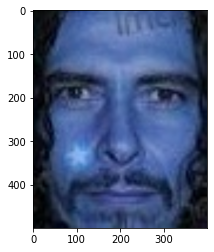

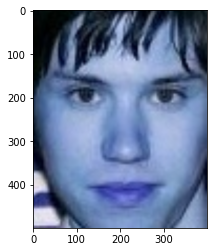

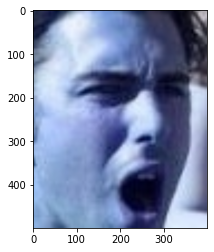

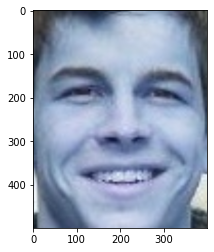

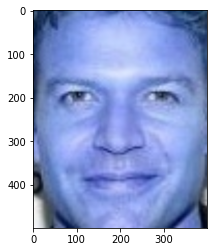

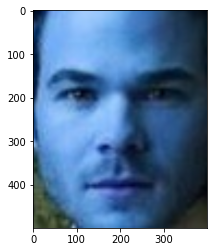

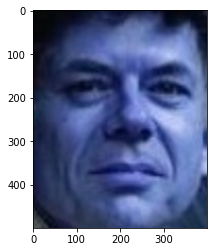

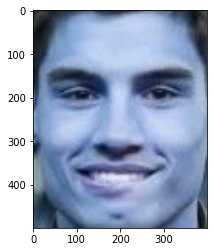

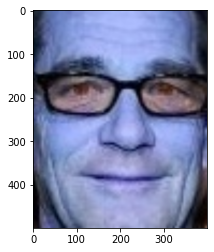

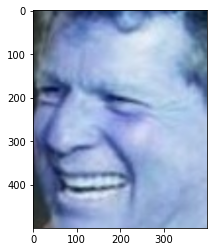

In [5]:
img_folder = os.listdir('./Training/male')
rows, cols = 2, 5
for n in range(0, 10):
    image = cv2.imread(os.path.join('./Training/male/', img_folder[random.randint(0, len(img_folder))]))
    image = cv2.resize(image, (5*IMG_width, 5*IMG_height))
    plt.imshow(image)
    plt.show()

# Visualizing few random female images

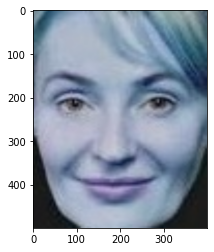

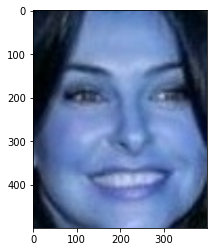

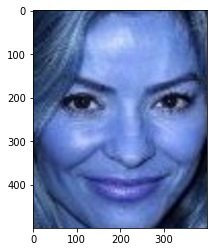

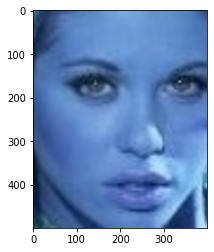

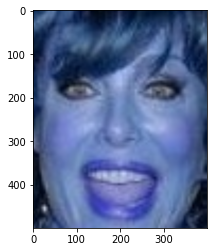

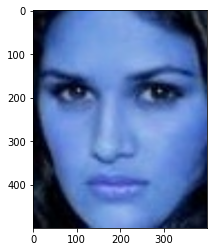

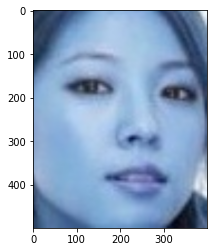

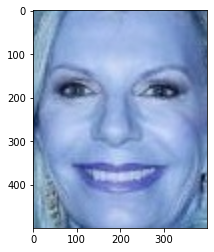

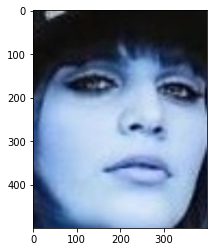

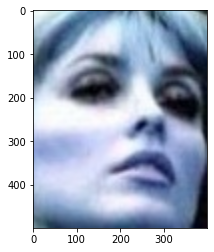

In [6]:
img_folder = os.listdir('./Training/female')
rows, cols = 2, 5
for n in range(0, 10):
    image = cv2.imread(os.path.join('./Training/female/', img_folder[random.randint(0, len(img_folder))]))
    image = cv2.resize(image, (5*IMG_width, 5*IMG_height))
    plt.imshow(image)
    plt.show()

# CNN model 

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_width, IMG_height, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.BatchNormalization())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

2022-06-27 03:55:15.367432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-27 03:55:17.073930: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9645 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:18:00.0, compute capability: 7.5
2022-06-27 03:55:17.074801: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9645 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:3b:00.0, compute capability: 7.5
2022-06-27 03:55:17.075460: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/repli

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 10, 128)       0

# Model compiling and checkpoints

In [9]:
model.compile(optimizer= 'Adam',
              loss = 'binary_crossentropy',
              metrics= 'binary_accuracy')

In [10]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./gender_model.weihgts.h5', 
                                             save_best_only = True,
                                             monitor= 'val_binary_accuracy',
                                             mode = 'max')

# Model fitting

In [11]:
batch_size = 512
history  = model.fit(train_gen,
                     validation_data=test_gen,
                    steps_per_epoch=len(train_gen.filenames)//batch_size,
                     validation_steps= len(test_gen.filenames)//batch_size,
                    epochs=30)

Epoch 1/30


2022-06-27 03:55:22.482723: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-06-27 03:55:23.282546: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.194, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


91/91 [==============================] - 144s 2s/step - loss: 0.7395 - binary_accuracy: 0.5592 - val_loss: 0.6906 - val_binary_accuracy: 0.5170
Epoch 2/30
91/91 [==============================] - 140s 2s/step - loss: 0.6317 - binary_accuracy: 0.6548 - val_loss: 0.6716 - val_binary_accuracy: 0.5774
Epoch 3/30
91/91 [==============================] - 140s 2s/step - loss: 0.5188 - binary_accuracy: 0.7453 - val_loss: 0.8326 - val_binary_accuracy: 0.5277
Epoch 4/30
91/91 [==============================] - 139s 2s/step - loss: 0.3548 - binary_accuracy: 0.8480 - val_loss: 0.6735 - val_binary_accuracy: 0.6737
Epoch 5/30
91/91 [==============================] - 139s 2s/step - loss: 0.2879 - binary_accuracy: 0.8835 - val_loss: 0.5118 - val_binary_accuracy: 0.7770
Epoch 6/30
91/91 [==============================] - 139s 2s/step - loss: 0.2580 - binary_accuracy: 0.8990 - val_loss: 0.2642 - val_binary_accuracy: 0.8984
Epoch 7/30
91/91 [==============================] - 139s 2s/step - loss: 0.2348 -

# Plotting charts

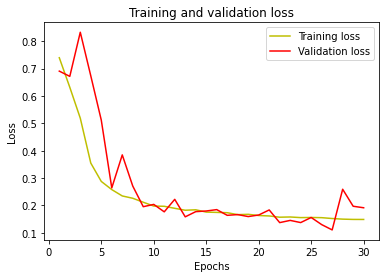

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

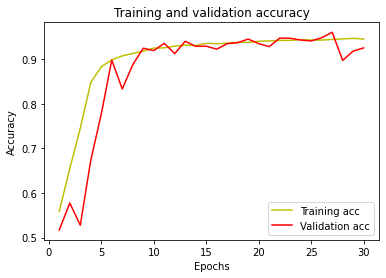

In [16]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Testing model with test data

In [38]:
test_loss, test_acc = model.evaluate(test_gen, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

50/50 [==============================] - 18s 354ms/step - loss: 0.1824 - binary_accuracy: 0.9305
test acc: 0.930468738079071
test_loss: 0.182403102517128


# Random images vs model predictions

1/1 [==============================] - 0s 20ms/step
Prediction: Male


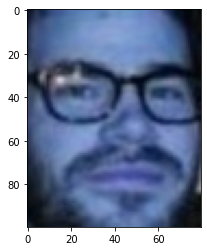

In [93]:
test_folderM = os.listdir('./Validation/male')
img_path = os.path.join('./Validation/male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)

1/1 [==============================] - 0s 25ms/step
Prediction: Male


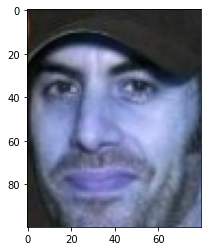

In [94]:
test_folderM = os.listdir('./Validation/male')
img_path = os.path.join('./Validation/male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)

1/1 [==============================] - 0s 26ms/step
Prediction: Male


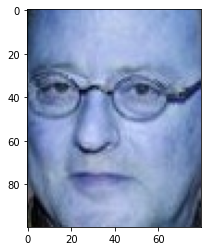

In [95]:
test_folderM = os.listdir('./Validation/male')
img_path = os.path.join('./Validation/male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)

1/1 [==============================] - 0s 26ms/step
Prediction: Male


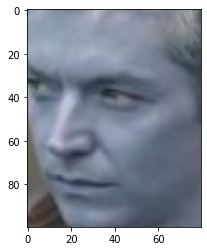

In [96]:
test_folderM = os.listdir('./Validation/male')
img_path = os.path.join('./Validation/male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)

1/1 [==============================] - 0s 25ms/step
Prediction: Male


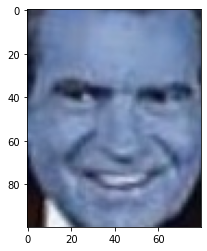

In [98]:
test_folderM = os.listdir('./Validation/male')
img_path = os.path.join('./Validation/male/', test_folderM[random.randint(0, len(test_folderM))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)

1/1 [==============================] - 0s 26ms/step
Prediction: Female


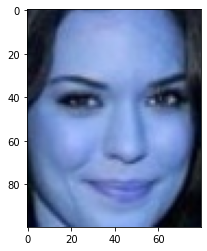

In [86]:
test_folderF = os.listdir('./Validation/female')
img_path = os.path.join('./Validation/female/', test_folderF[random.randint(0, len(test_folderF))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction: Female


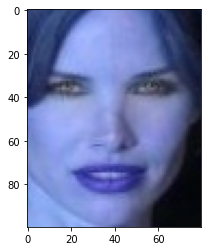

In [99]:
test_folderF = os.listdir('./Validation/female')
img_path = os.path.join('./Validation/female/', test_folderF[random.randint(0, len(test_folderF))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction: Female


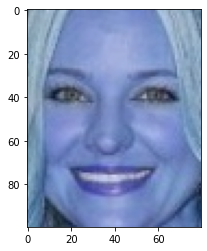

In [100]:
test_folderF = os.listdir('./Validation/female')
img_path = os.path.join('./Validation/female/', test_folderF[random.randint(0, len(test_folderF))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 29ms/step
Prediction: Female


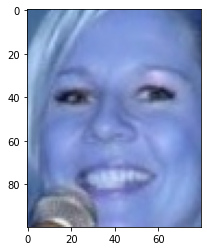

In [101]:
test_folderF = os.listdir('./Validation/female')
img_path = os.path.join('./Validation/female/', test_folderF[random.randint(0, len(test_folderF))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)
plt.show()

1/1 [==============================] - 0s 21ms/step
Prediction: Female


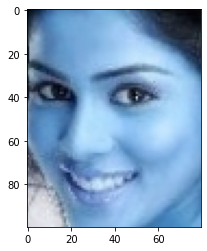

In [103]:
test_folderF = os.listdir('./Validation/female')
img_path = os.path.join('./Validation/female/', test_folderF[random.randint(0, len(test_folderF))])
image = cv2.imread(img_path)
image = cv2.resize(image, (IMG_width, IMG_height))
img = np.expand_dims(image, axis=0)
result = model.predict(img)
if result > 0.5: 
    print("Prediction: Male")
else:
    print("Prediction: Female")
plt.imshow(image)
plt.show()